# Figure Generation

*Code to generate the figures from the data generated from the other notebooks.*

Olivia Yoo

Neuro 140 Final Project

May 2, 2023

In [1]:
%matplotlib inline
import os
import random
import copy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
ROIS = np.arange(4)
N_ROIS = 4
ROI_NAMES = ['lFFA', 'rFFA', 'lPPA', 'rPPA']
SUBJECTS = ['BE', 'KO', 'SN', 'TI']
N_SUBJECTS = 4
BINSIZE = [11, 12, 11, 12, 22, 24]
ORDERED_CATEGORIES = ['human face', 'human body part', 'nonhuman face', 'nonhuman body part', 'natural inanimate', 'artificial inanimate']

# Import data

## RDMs

### Human data

In [11]:
HUMAN_PATH = os.path.dirname(os.getcwd()) + '/data/colab_data/human_data.npy'
HUMAN_PERM_PATH = os.path.dirname(os.getcwd()) + '/data/colab_data/human_permuted.npz'

In [12]:
# HUMAN RDMS
human_data = np.load(HUMAN_PATH)
human_rdms = human_data[1:][0]

In [15]:
# PERMUTED HUMAN RDMS
human_perm_data = np.load(HUMAN_PERM_PATH)
human_perm_data = np.array([human_perm_data['lffa'], human_perm_data['rffa'],human_perm_data['lppa'], human_perm_data['rppa']])

### CNN data

In [17]:
CNN_RDM_PATH = os.path.dirname(os.getcwd()) + '/data/cnn_data'

In [19]:
ALEXNET_PATH = CNN_RDM_PATH + '/alexnet_rdms.npy'
RN18_PATH = CNN_RDM_PATH + '/rn18_rdms.npy'
RN34_PATH = CNN_RDM_PATH + '/rn34_rdms.npy'
RN50_PATH = CNN_RDM_PATH + '/rn50_rdm.npy'
RN50_MOD_PATH = CNN_RDM_PATH + '/rn50_mod_rdm.npy'
RN101_PATH = CNN_RDM_PATH + '/rn101_rdm.npy'
RN101_MOD_PATH = CNN_RDM_PATH + '/rn101_mod_rdm.npy'
RN152_PATH = CNN_RDM_PATH + '/rn152_rdm.npy'
RN152_MOD_PATH = CNN_RDM_PATH + '/rn152_mod_rdm.npy'

In [20]:
alexnet_rdms = np.load(ALEXNET_PATH)
alexnet_rdms.shape

(2, 8, 92, 92)

In [21]:
rn18_rdms = np.load(RN18_PATH)
rn18_rdms.shape

(2, 21, 92, 92)

In [22]:
rn34_rdms = np.load(RN34_PATH)
rn34_rdms.shape

(2, 37, 92, 92)

In [23]:
rn50_rdm = np.load(RN50_PATH)
rn50_mod_rdm = np.load(RN50_MOD_PATH)
rn50_rdms = np.asarray([rn50_rdm, rn50_mod_rdm])
rn50_rdms.shape

(2, 54, 92, 92)

In [24]:
rn101_rdm = np.load(RN101_PATH)
rn101_mod_rdm = np.load(RN101_MOD_PATH)
rn101_rdms = np.asarray([rn101_rdm, rn101_mod_rdm])
rn101_rdms.shape

(2, 105, 92, 92)

In [25]:
rn152_rdm = np.load(RN152_PATH)
rn152_mod_rdm = np.load(RN152_MOD_PATH)
rn152_rdms = np.asarray([rn152_rdm, rn152_mod_rdm])
rn152_rdms.shape

(2, 156, 92, 92)

## Mapping data

In [5]:
MAP_DATA_PATH = os.path.dirname(os.getcwd()) + '/data/mapping'

In [8]:
# normal image human/CNN maps
alexnet_map = np.load(MAP_DATA_PATH + '/alexnet_map.npy')
rn18_map = np.load(MAP_DATA_PATH + '/rn18_map.npy')
rn34_map = np.load(MAP_DATA_PATH + '/rn34_map.npy')
rn50_map = np.load(MAP_DATA_PATH + '/rn50_map.npy')
rn101_map = np.load(MAP_DATA_PATH + '/rn101_map.npy')
rn152_map = np.load(MAP_DATA_PATH + '/rn152_map.npy')

In [9]:
# MODIFIED image human/CNN maps
alexnet_mod_map = np.load(MAP_DATA_PATH + '/alexnet_mod_map.npy')
rn18_mod_map = np.load(MAP_DATA_PATH + '/rn18_mod_map.npy')
rn34_mod_map = np.load(MAP_DATA_PATH + '/rn34_mod_map.npy')
rn50_mod_map = np.load(MAP_DATA_PATH + '/rn50_mod_map.npy')
rn101_mod_map = np.load(MAP_DATA_PATH + '/rn101_mod_map.npy')
rn152_mod_map = np.load(MAP_DATA_PATH + '/rn152_mod_map.npy')

In [ ]:
# CNN layer correlations
alexnet_mod_map = np.load(MAP_DATA_PATH + '/alexnet_mod_map.npy')
rn18_mod_map = np.load(MAP_DATA_PATH + '/rn18_mod_map.npy')
rn34_mod_map = np.load(MAP_DATA_PATH + '/rn34_mod_map.npy')
rn50_mod_map = np.load(MAP_DATA_PATH + '/rn50_mod_map.npy')
rn101_mod_map = np.load(MAP_DATA_PATH + '/rn101_mod_map.npy')
rn152_mod_map = np.load(MAP_DATA_PATH + '/rn152_mod_map.npy')

# Visualize RDMs

In [27]:
# Plot a single RDM
def plot_rdm(rdm, title='', save=False, save_name='rsm.png'):
  
  # plot
  fig, ax = plt.subplots(1, 1, figsize=(8,7))

  plt.imshow(rdm, cmap='jet', vmin=0, vmax=100)
  plt.colorbar()

  edges = np.concatenate([np.asarray([0]), np.cumsum(BINSIZE)])[:-1]
  ax.set_xticks(list(np.array(edges)+4))
  ax.set_xticklabels(ORDERED_CATEGORIES, rotation = 90)
  ax.set_yticks(list(np.array(edges)+4))
  ax.set_yticklabels(ORDERED_CATEGORIES)
  ax.vlines(edges,0,92, color='black')
  ax.hlines(edges,0,92, color='black')
  ax.set_title(title)
  
  # save
  if save:
    plt.savefig(save_name, dpi=300, bbox_inches='tight')

  plt.show()
  return

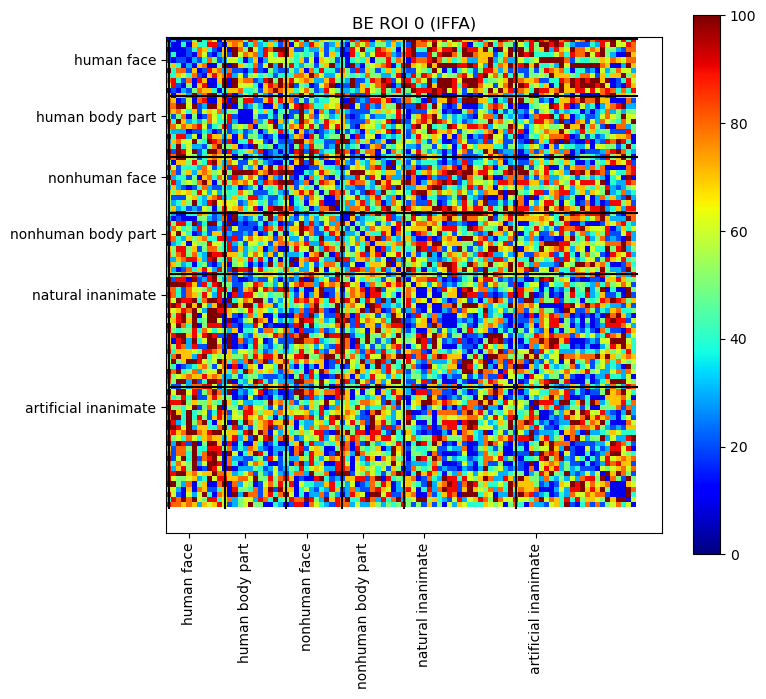

In [28]:
plot_rdm(human_rdms[0,0], title="BE ROI 0 (lFFA)")

# Visualize human/CNN maps

In [29]:
rn18_layer_names = ['C1',
                    'C2',
                    'C3',
                    'C4',
                    'C5',
                    'C6',
                    'C7',
                    'C8',
                    'C9',
                    'C10',
                    'C11',
                    'C12',
                    'C13',
                    'C14',
                    'C15',
                    'C16',
                    'C17',
                    'C18',
                    'C19',
                    'C20',
                    'FC21',]

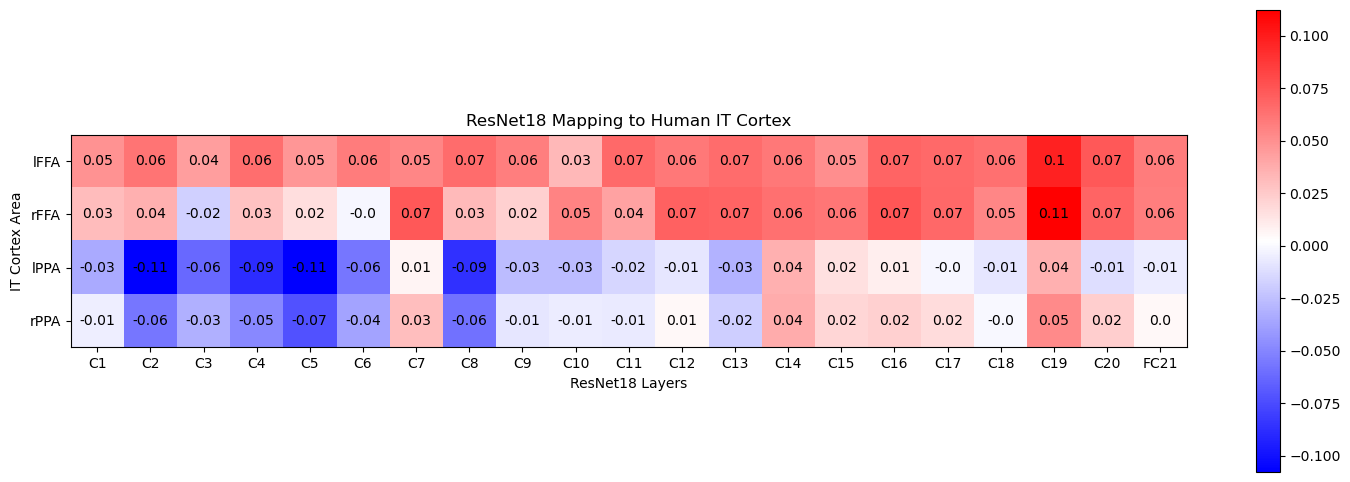

In [30]:
# Create heatmap
fig, ax = plt.subplots(figsize=(18,6))
heatmap = ax.imshow(rn18_map, cmap='bwr')

# Add value annotations to each cell
for i in range(rn18_map.shape[0]):
    for j in range(rn18_map.shape[1]):
        ax.annotate(str(round(rn18_map[i,j],2)), xy=(j, i), 
                    horizontalalignment='center', verticalalignment='center')

# Add colorbar
cbar = ax.figure.colorbar(heatmap, ax=ax)

# Set axis labels
ax.set_xticks(np.arange(rn18_map.shape[1]))
ax.set_yticks(np.arange(rn18_map.shape[0]))
ax.set_xticklabels(rn18_layer_names)
ax.set_yticklabels(ROI_NAMES)
ax.set_xlabel("ResNet18 Layers")
ax.set_ylabel("IT Cortex Area")

# Rotate the tick labels and set their alignment
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")

# Set title
ax.set_title("ResNet18 Mapping to Human IT Cortex")

# Show the plot
plt.show()